# Mathematical Underpinnings - Lab 4

In [5]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer as KBins
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [6]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [7]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

LinAlgError: Matrix is not positive definite

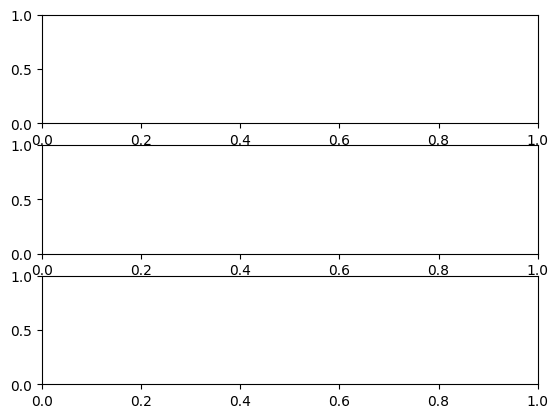

In [8]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [ ]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to; 
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)

In [ ]:
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
bins = KBins(n_bins=10,  encode='ordinal')
x_bins = bins.fit_transform(data_2d[:,0].reshape(-1,1)).reshape(-1)
y_bins = bins.fit_transform(data_2d[:,1].reshape(-1,1)).reshape(-1)
print(f'p=0, pearson: {np.corrcoef(data_2d[:,0], data_2d[:,1])[0,1]}, MI: {mutual_info_score(x_bins, y_bins)} ')

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
x_bins = bins.fit_transform(data_2d[:,0].reshape(-1,1)).reshape(-1)
y_bins = bins.fit_transform(data_2d[:,1].reshape(-1,1)).reshape(-1)
print(f'p=0.5, pearson: {np.corrcoef(data_2d[:,0], data_2d[:,1])[0,1]}, MI: {mutual_info_score(x_bins, y_bins)} ')

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
x_bins = bins.fit_transform(data_2d[:,0].reshape(-1,1)).reshape(-1)
y_bins = bins.fit_transform(data_2d[:,1].reshape(-1,1)).reshape(-1)
print(f'p=1, pearson: {np.corrcoef(data_2d[:,0], data_2d[:,1])[0,1]}, MI: {mutual_info_score(x_bins, y_bins)} ')

p=0, pearson: 0.004647340469616561, MI: 0.030609097625208644 
p=0.5, pearson: 0.49611911658847135, MI: 0.16940524043864957 
p=1, pearson: 1.0, MI: 2.302585092994045 


#### bp 3)

In [ ]:
import warnings
import pandas as pd
def visualise(p_list, n=1000, N=100):
    corr_coeffs = {}
    MI_coeffs = {}
    
    for p in p_list:
        corr_coeffs[p] = []
        MI_coeffs[p] = []
        for _ in range(N):
            data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
            bins = KBins(n_bins=10,  encode='ordinal')
            x_bins = bins.fit_transform(data_2d[:,0].reshape(-1,1)).reshape(-1)
            y_bins = bins.fit_transform(data_2d[:,1].reshape(-1,1)).reshape(-1)
            corr_coeffs[p].append(np.corrcoef(data_2d[:,0], data_2d[:,1])[0,1])
            MI_coeffs[p].append(mutual_info_score(x_bins, y_bins))
        corr_coeffs[p] = np.mean(corr_coeffs[p])
        MI_coeffs[p] = np.mean(MI_coeffs[p])

    df = pd.DataFrame({"p":p_list, 'pearson':corr_coeffs.values(), "MI":MI_coeffs.values()}) 
    df.boxplot(by='p')
    return corr_coeffs, MI_coeffs

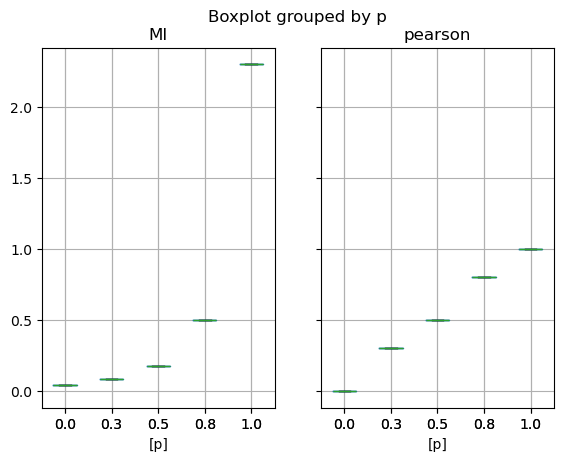

In [ ]:
p_list = np.array([0, 0.3, 0.5, 0.8, 1])
corr, MI = visualise(p_list)

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [ ]:
corr = np.array(list(corr.values()))
mi = np.array(list(MI.values()))
y1= -np.log(1-corr**2)/2
y2 = -np.log(1-p_list**2)/2

C:\Users\smolenj\AppData\Local\Temp\ipykernel_5292\2873768582.py:3: RuntimeWarning: divide by zero encountered in log
  y1= -np.log(1-corr**2)/2
C:\Users\smolenj\AppData\Local\Temp\ipykernel_5292\2873768582.py:4: RuntimeWarning: divide by zero encountered in log
  y2 = -np.log(1-p_list**2)/2


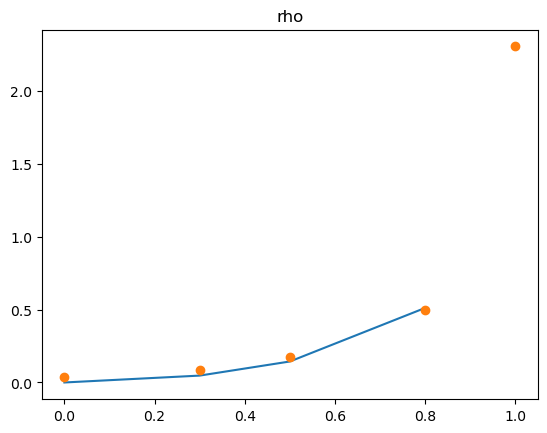

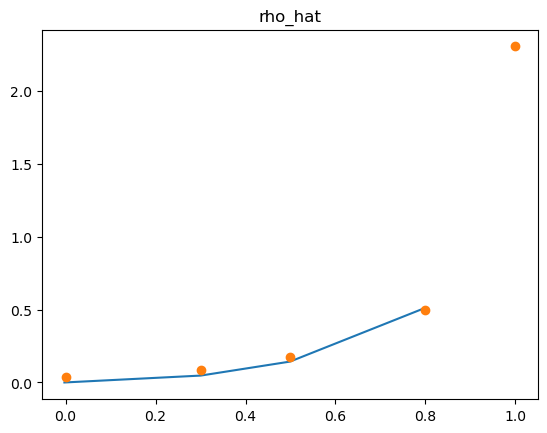

In [ ]:
plt.plot(p_list, y2)
plt.plot(p_list, mi, "o")
plt.title('rho')
plt.show()
plt.plot(corr, y1)
plt.plot(p_list, mi, "o")
plt.title('rho_hat')
plt.show()

### b)

#### bp 1)

In [ ]:
# again: this is too time consuming so here is an answer

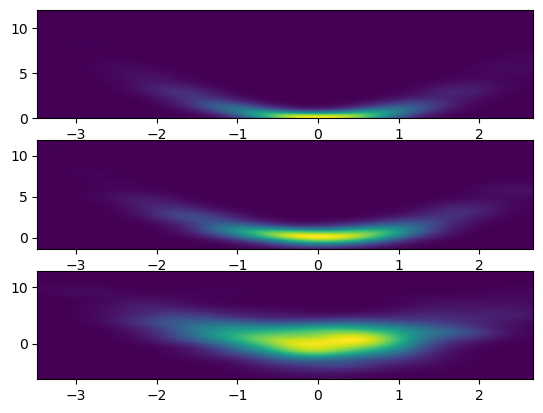

In [ ]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [ ]:
data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
bins = KBins(n_bins=10,  encode='ordinal')
x_bins = bins.fit_transform(data_2d[:,0].reshape(-1,1)).reshape(-1)
y_bins = bins.fit_transform(data_2d[:,1].reshape(-1,1)).reshape(-1)
print(f'sigma=0, pearson: {np.corrcoef(data_2d[:,0], data_2d[:,1])[0,1]}, MI: {mutual_info_score(x_bins, y_bins)} ')

data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
x_bins = bins.fit_transform(data_2d[:,0].reshape(-1,1)).reshape(-1)
y_bins = bins.fit_transform(data_2d[:,1].reshape(-1,1)).reshape(-1)
print(f'sigma=0.5, pearson: {np.corrcoef(data_2d[:,0], data_2d[:,1])[0,1]}, MI: {mutual_info_score(x_bins, y_bins)} ')

data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
x_bins = bins.fit_transform(data_2d[:,0].reshape(-1,1)).reshape(-1)
y_bins = bins.fit_transform(data_2d[:,1].reshape(-1,1)).reshape(-1)
print(f'sigma=2, pearson: {np.corrcoef(data_2d[:,0], data_2d[:,1])[0,1]}, MI: {mutual_info_score(x_bins, y_bins)} ')

sigma=0, pearson: -0.11772466209016189, MI: 1.4779137647508807 
sigma=0.5, pearson: -0.12202550413375049, MI: 0.5494651173189007 
sigma=2, pearson: -0.08527289919369968, MI: 0.1547415434091417 


In [ ]:
def visualise(sigma_list, n=1000, N=100):
    corr_coeffs = {}
    MI_coeffs = {}
    
    for s in sigma_list:
        corr_coeffs[s] = []
        MI_coeffs[s] = []
        for _ in range(N):
            data_2d = data_2d = np.array([x, x**2 + np.random.normal(0, s, n)]).T
            bins = KBins(n_bins=10,  encode='ordinal')
            x_bins = bins.fit_transform(data_2d[:,0].reshape(-1,1)).reshape(-1)
            y_bins = bins.fit_transform(data_2d[:,1].reshape(-1,1)).reshape(-1)
            corr_coeffs[s].append(np.corrcoef(data_2d[:,0], data_2d[:,1])[0,1])
            MI_coeffs[s].append(mutual_info_score(x_bins, y_bins))
        corr_coeffs[s] = np.mean(corr_coeffs[s])
        MI_coeffs[s] = np.mean(MI_coeffs[s])

    df = pd.DataFrame({"sigma":sigma_list, 'pearson':corr_coeffs.values(), "MI":MI_coeffs.values()}) 
    df.boxplot(by='sigma')
    return corr_coeffs, MI_coeffs

({0: -0.11772466209016187, 0.5: -0.10924382532359557, 2: -0.06942510673608249},
 {0: 1.4779137647508813, 0.5: 0.5766576837579294, 2: 0.16427562098638984})

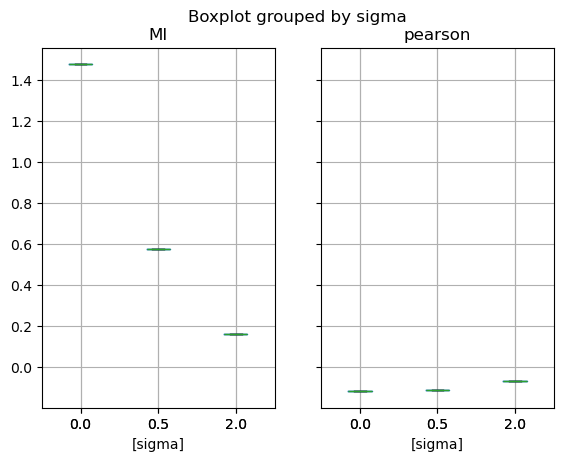

In [ ]:
visualise([0, 0.5, 2])

## Task 2

### a)

In [23]:
def indep_test_asymptotic(X, Y, stat):

    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        
        stat_value = test_res[0]

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [21]:
def indep_test_permutation(X, Y, B):

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [27]:
# dependent r.v. - ideally we will reject the null hypothesis
x1 = np.random.normal(size=1000)
x2  =  np.random.normal(size=1000)
_, x1_bins = np.histogram(x1)
_,x2_bins = np.histogram(x2)
x1 = np.digitize(x1, x1_bins)
x2 = np.digitize(x2, x2_bins)
asymp_result_mi = indep_test_asymptotic(x1,x2,"mi")
print(f'Asymptotic independence based on MI: test_statistic: {asymp_result_mi[0]}, p_val: {asymp_result_mi[1]}')
asymp_results_chi2 = indep_test_asymptotic(x1,x2,"chi2")
print(f'Asymptotic independence based on pearson chi2: test_statistic: {asymp_results_chi2[0]}, p_val: {asymp_results_chi2[1]}')
perm_results = indep_test_permutation(x1, x2,100)
print(f'permutation test results: test_statistic: {perm_results[0]}, p_val: {perm_results[1]}')

Asymptotic independence based on MI: test_statistic: 74.56544394590247, p_val: 0.9732165461832317
Asymptotic independence based on pearson chi2: test_statistic: 73.94101643582036, p_val: 0.9763873049025344
permutation test results: test_statistic: 74.56544394590247, p_val: 0.9405940594059405


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [33]:
# dependent r.v. - ideally we will reject the null hypothesis
x = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), 100)
x1 = x[:,0]
x2 = x[:,1]
_, x1_bins = np.histogram(x1)
_,x2_bins = np.histogram(x2)
x1 = np.digitize(x1, x1_bins)
x2 = np.digitize(x2, x2_bins)
asymp_result_mi = indep_test_asymptotic(x1,x2,"mi")
print(f'Asymptotic independence based on MI: test_statistic: {asymp_result_mi[0]}, p_val: {asymp_result_mi[1]}')
asymp_results_chi2 = indep_test_asymptotic(x1,x2,"chi2")
print(f'Asymptotic independence based on pearson chi2: test_statistic: {asymp_results_chi2[0]}, p_val: {asymp_results_chi2[1]}')
perm_results = indep_test_permutation(x1, x2,100)
print(f'permutation test results: test_statistic: {perm_results[0]}, p_val: {perm_results[1]}')

Asymptotic independence based on MI: test_statistic: 110.45815111000653, p_val: 0.2230431467583719
Asymptotic independence based on pearson chi2: test_statistic: 127.2159361758024, p_val: 0.03442434300724695
permutation test results: test_statistic: 110.45815111000653, p_val: 0.04950495049504951
